In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv('modified_placement_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


Data Cleaning

In [3]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [4]:
df[df.cgpa.isna()]

,cgpa,iq,placement
9,NaN,66.0,No
54,NaN,141.0,Yes
81,NaN,107.0,No
85,NaN,166.0,Yes
91,NaN,158.0,Yes


In [5]:
df['cgpa'] = df['cgpa'].str.replace(',', '.')
df['cgpa'] = pd.to_numeric(df.cgpa, errors='coerce')

In [6]:
df.cgpa = df.cgpa.fillna(df.cgpa.mean())

In [7]:
df.placement = df.placement.map({'Yes': 1, 'No': 0})

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Let's visualize how the data is scattered 

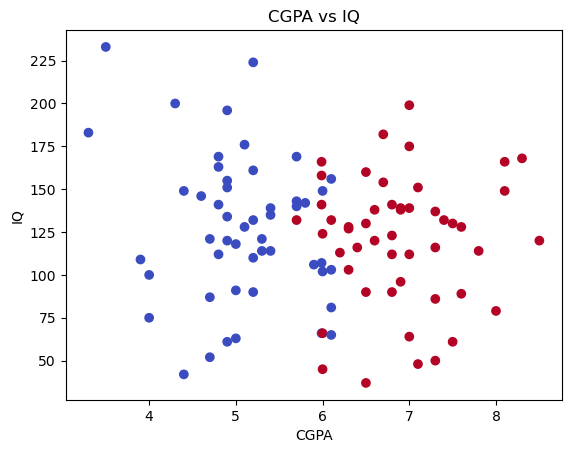

In [9]:
plt.scatter(df.cgpa, df.iq, c=df.placement, cmap='coolwarm')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ')
plt.show()

Next, we split the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


Next, we scale the data for better results or else the model will not be able to learn the patterns in the data

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



This library will help you understand how a plane divides both classes

In [15]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

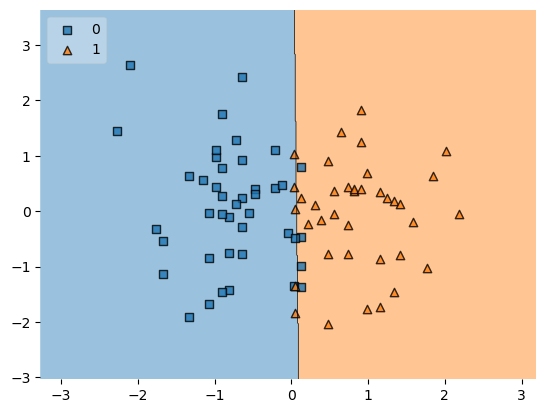

In [16]:
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

In [17]:
heart = pd.read_csv('heart_disease_uci.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [18]:
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [20]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']  

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cat_encoded = oe.fit_transform(heart[cat_cols])

cat_encoded_heart = pd.DataFrame(cat_encoded, columns=oe.get_feature_names_out(cat_cols))

heart = heart.drop(columns=cat_cols)
heart = pd.concat([heart.reset_index(drop=True), cat_encoded_heart.reset_index(drop=True)], axis=1)

In [21]:
heart.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex,dataset,cp,fbs,restecg,exang,slope,thal
0,1,63,145.0,233.0,150.0,2.3,0.0,0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
1,2,67,160.0,286.0,108.0,1.5,3.0,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,3,67,120.0,229.0,129.0,2.6,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,4,37,130.0,250.0,187.0,3.5,0.0,0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
4,5,41,130.0,204.0,172.0,1.4,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0


Column Descriptions:

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute


In [22]:
heart.isna().sum()

id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
num           0
sex           0
dataset       0
cp            0
fbs          90
restecg       2
exang        55
slope       309
thal        486
dtype: int64

- Impute with mean for `trestbps`, `chol`, `thalch`
- Impute with median for `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`
- Impute with mode for `oldpeak`

In [24]:
n_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']  
heart[n_cols] = heart[n_cols].replace(-1, np.nan)

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


mean_cols = ['trestbps', 'chol', 'thalch']
median_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
mode_cols = ['oldpeak']


preprocessor = ColumnTransformer(
    transformers=[
        ('mean_imputer', SimpleImputer(strategy='mean'), mean_cols),
        ('median_imputer', SimpleImputer(strategy='median'), median_cols),
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), mode_cols)
    ],
    remainder='passthrough'  
)

In [26]:
preprocessor.fit(heart)
heart_imputed_array = preprocessor.transform(heart)

transformed_cols = mean_cols + median_cols + mode_cols
pass_cols = [col for col in heart.columns if col not in transformed_cols]
final_cols = transformed_cols + pass_cols

heart_imputed = pd.DataFrame(heart_imputed_array, columns=final_cols)

In [29]:
X, y = heart_imputed.iloc[:, :-1], heart_imputed.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [31]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
lg.fit(X_train, y_train)
dt.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [32]:
y_pred_lg = lg.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score 
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred_lg))
print('Accuracy of Decision Tree:', accuracy_score(y_test, y_pred_dt))

Accuracy of Logistic Regression: 0.6086956521739131
Accuracy of Decision Tree: 0.45652173913043476


In [33]:
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.91      0.76       104
         1.0       0.53      0.26      0.35        31
         2.0       0.41      0.26      0.32        34
         3.0       0.00      0.00      0.00        15

    accuracy                           0.61       184
   macro avg       0.40      0.36      0.36       184
weighted avg       0.53      0.61      0.55       184



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64       104
         1.0       0.36      0.42      0.39        31
         2.0       0.16      0.21      0.18        34
         3.0       0.09      0.07      0.08        15

    accuracy                           0.46       184
   macro avg       0.32      0.32      0.32       184
weighted avg       0.48      0.46      0.47       184



In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lg, average='weighted'))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lg, average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lg, average='weighted'))

Logistic Regression Recall: 0.6086956521739131
Logistic Regression Precision: 0.5307245032400312
Logistic Regression F1 Score: 0.5458493463359632


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
print("Decision Tree Classification Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Classification Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Classification F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

Decision Tree Classification Recall: 0.45652173913043476
Decision Tree Classification Precision: 0.48404544022455176
Decision Tree Classification F1 Score: 0.46775084898344504
